In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [3]:
df.drop(['ID'],axis=1,inplace=True)

In [4]:
df.shape

(418, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

## Checking for percentage of null data in each column

In [7]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

## Checking for duplicate data

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

## Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


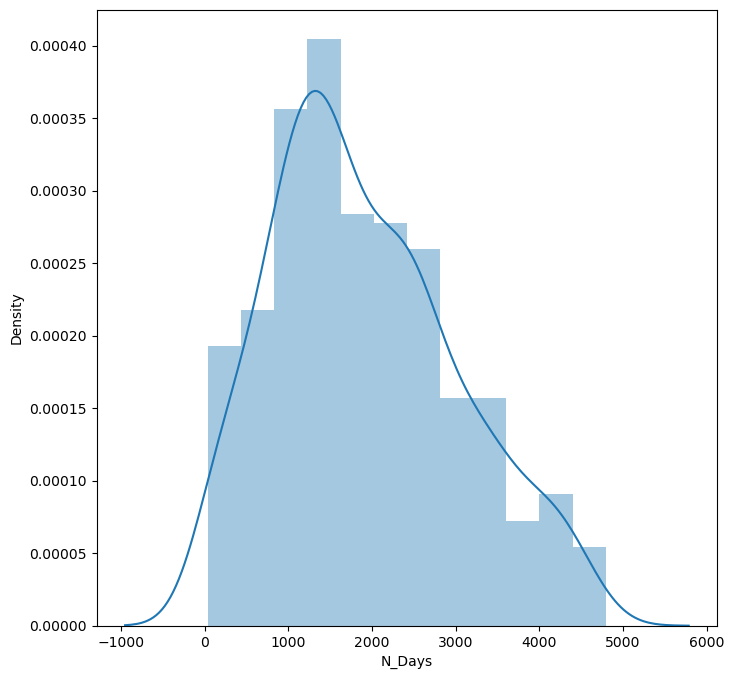

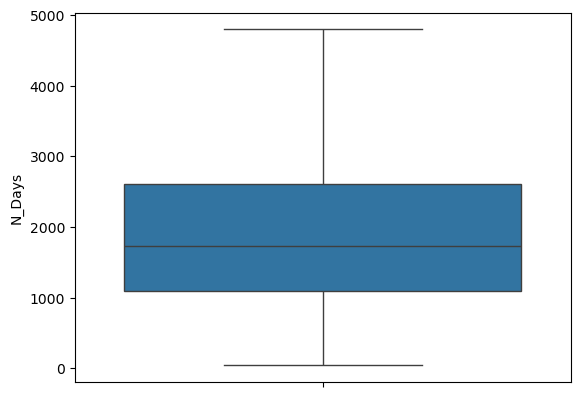

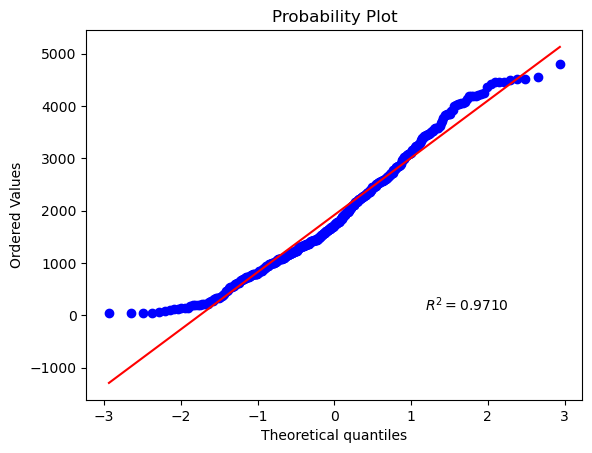

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


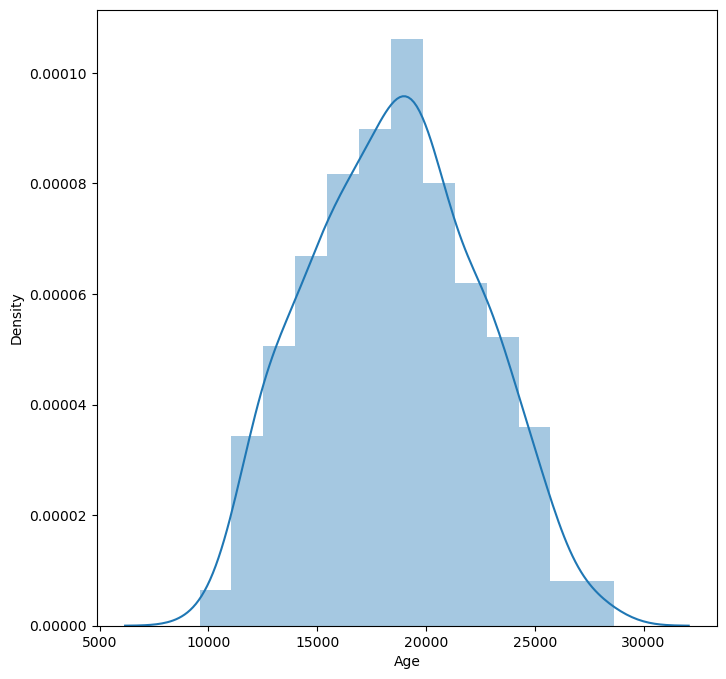

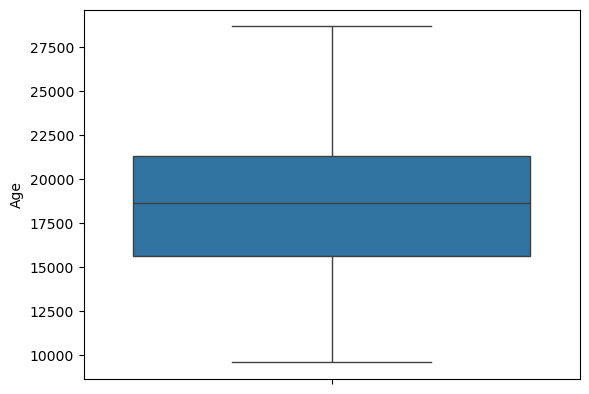

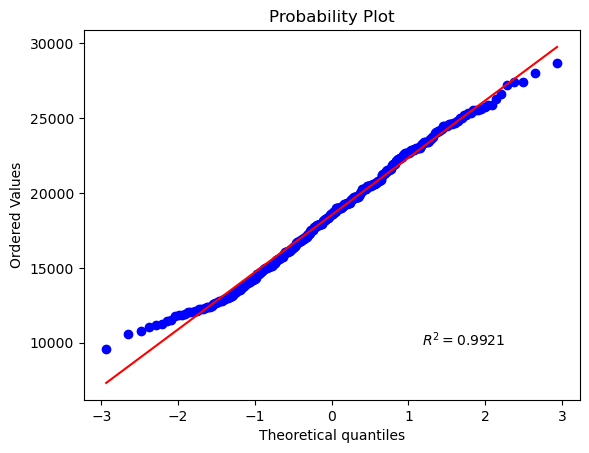

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


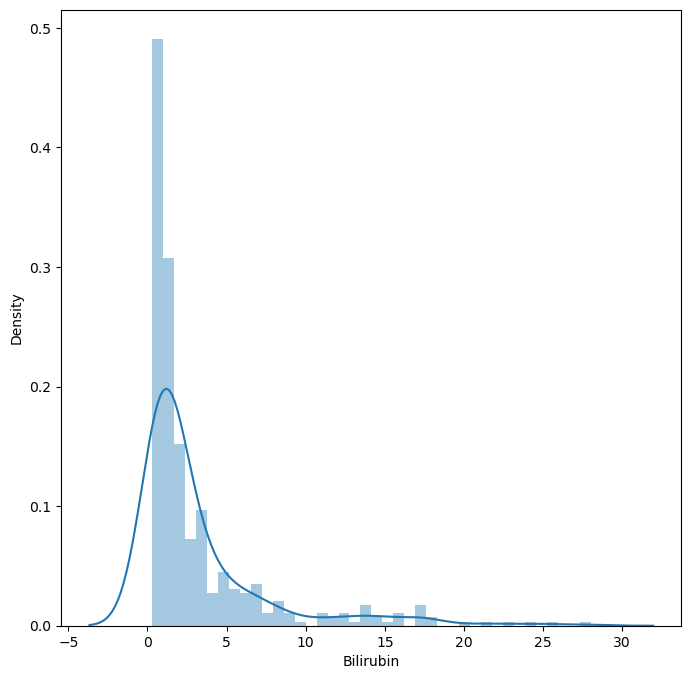

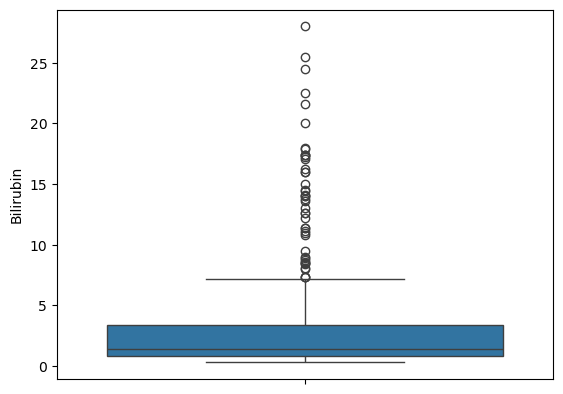

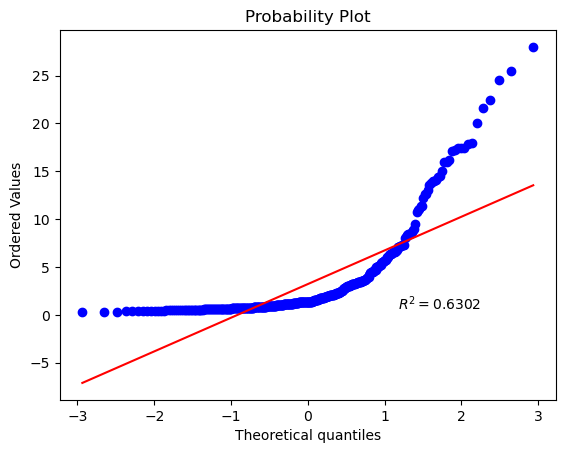

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


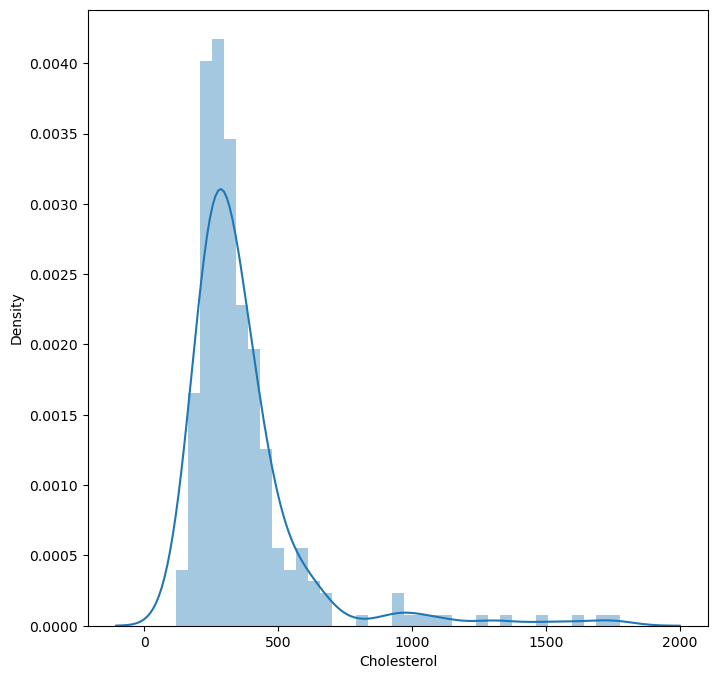

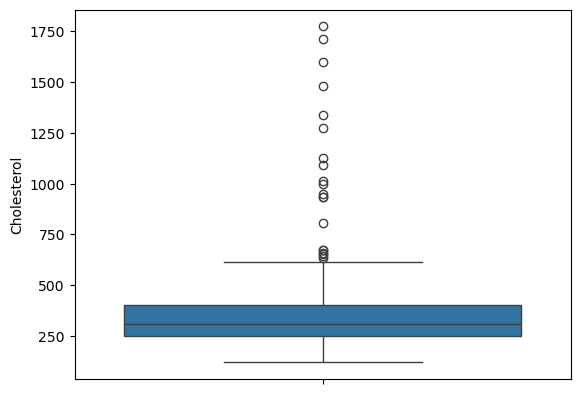

posx and posy should be finite values
posx and posy should be finite values


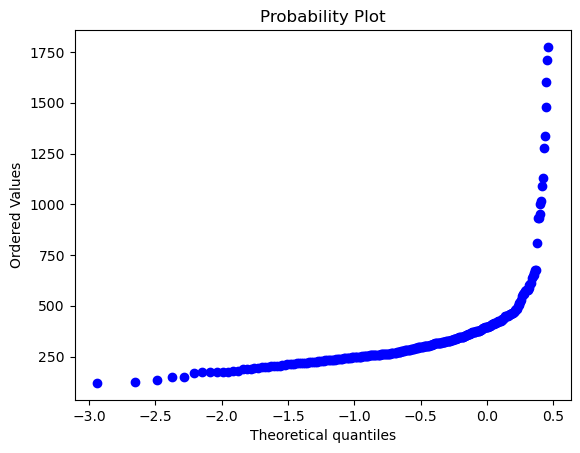

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


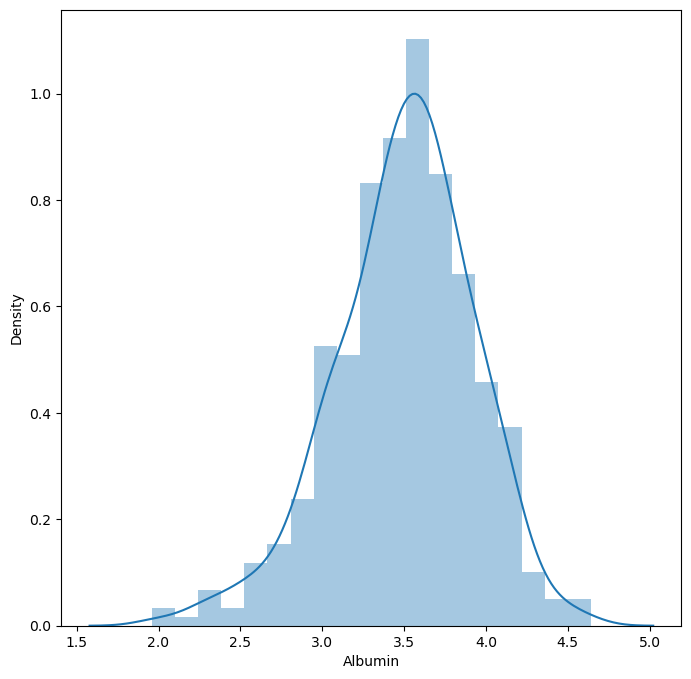

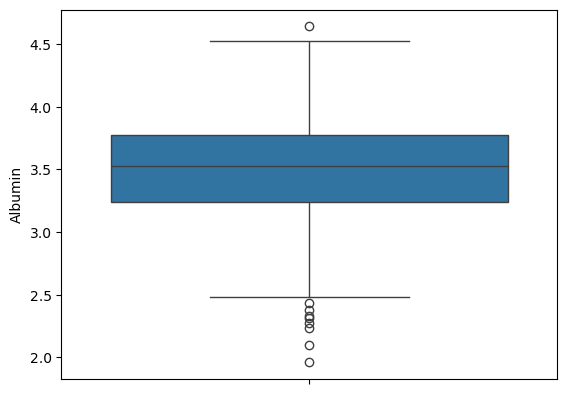

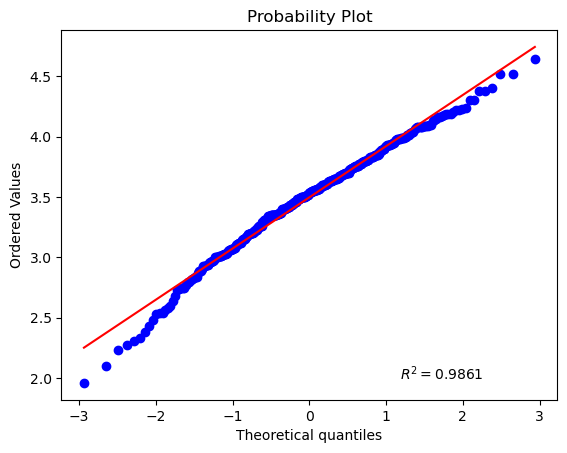

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


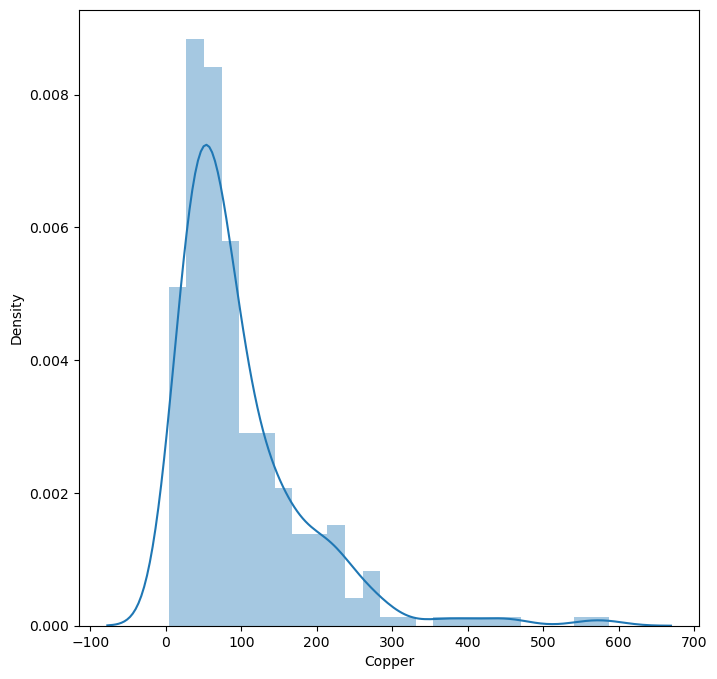

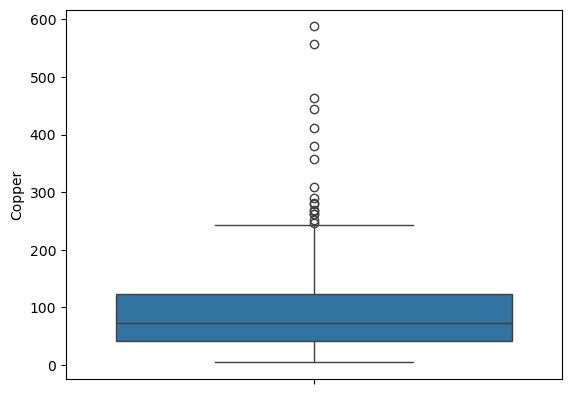

posx and posy should be finite values
posx and posy should be finite values


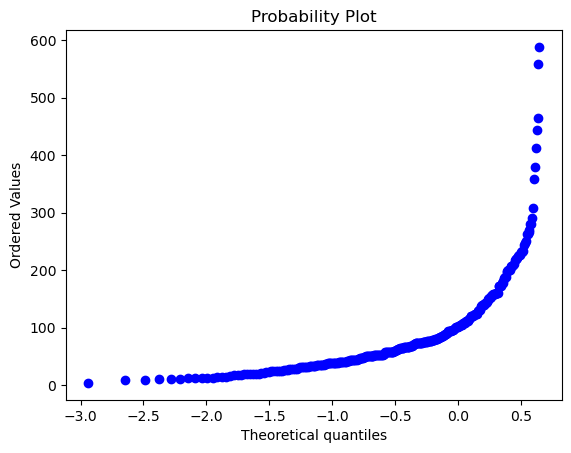

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


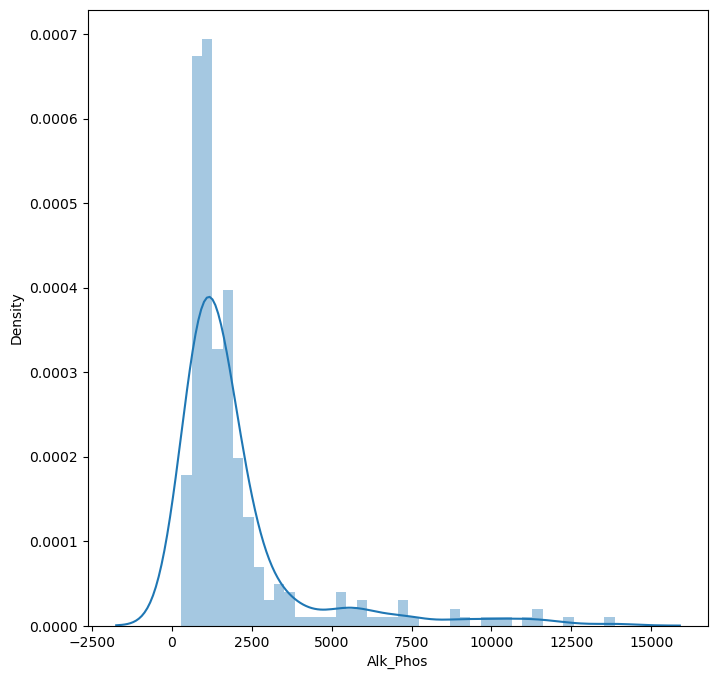

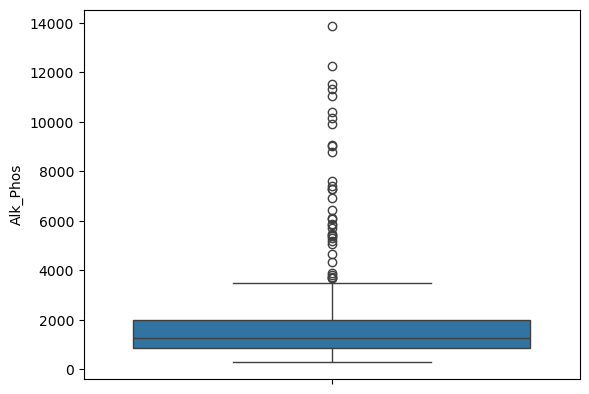

posx and posy should be finite values
posx and posy should be finite values


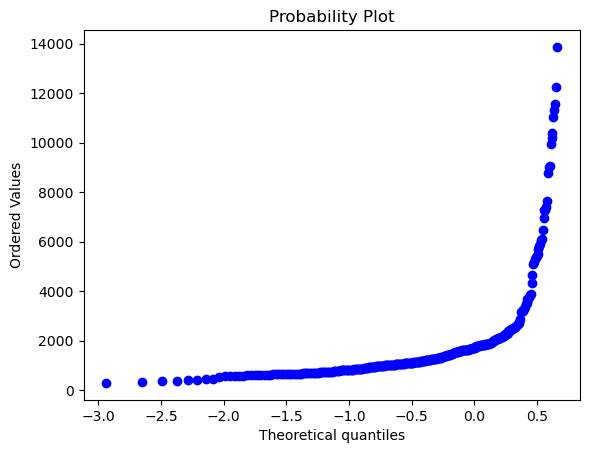

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


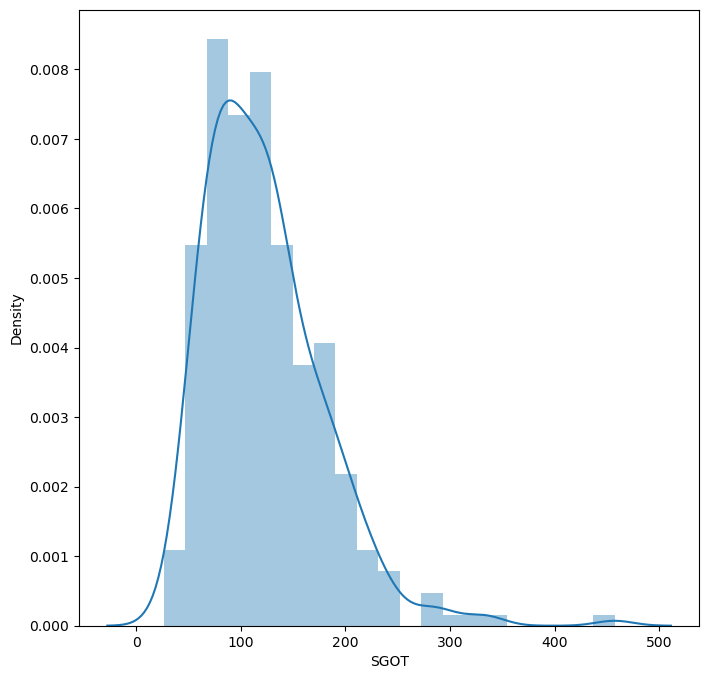

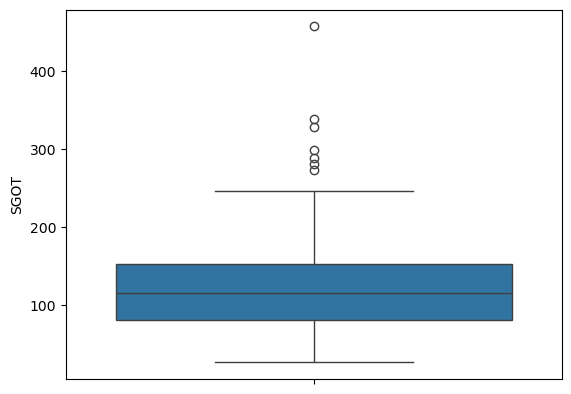

posx and posy should be finite values
posx and posy should be finite values


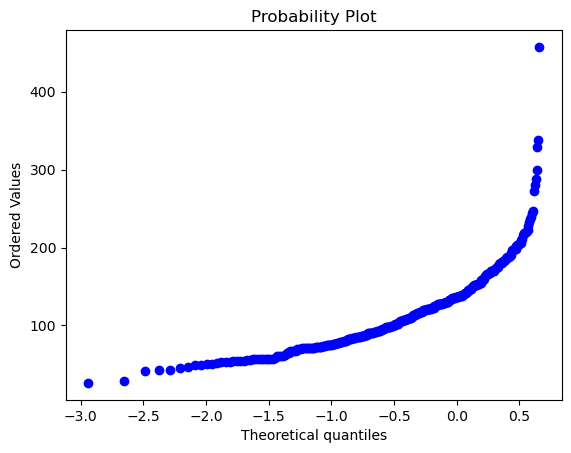

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


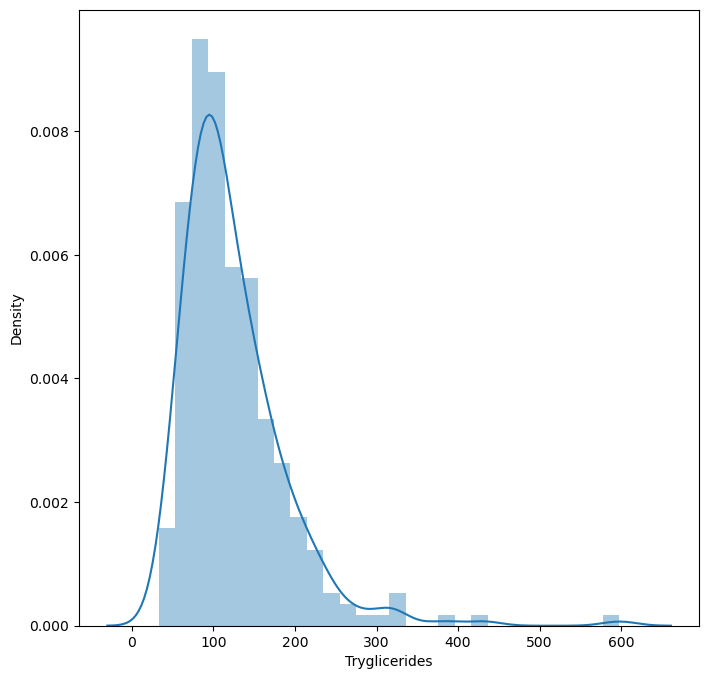

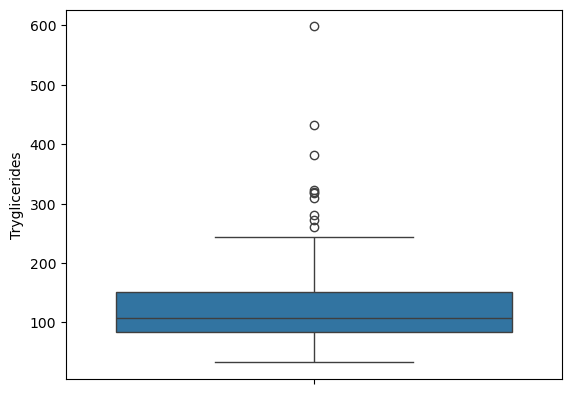

posx and posy should be finite values
posx and posy should be finite values


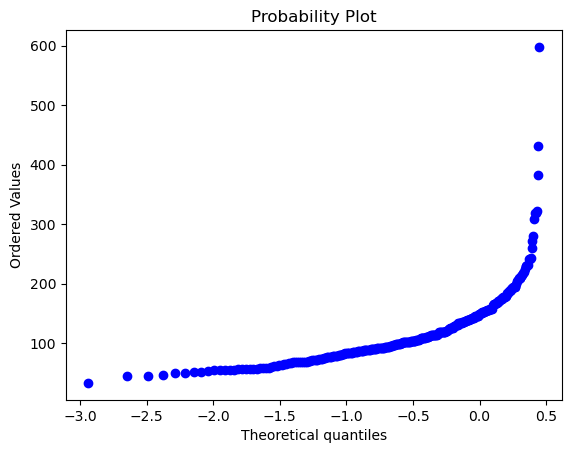

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


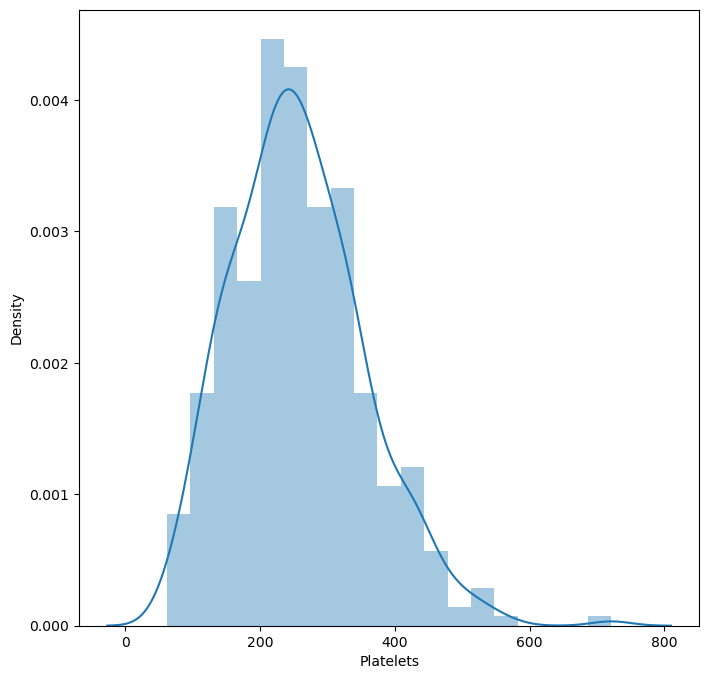

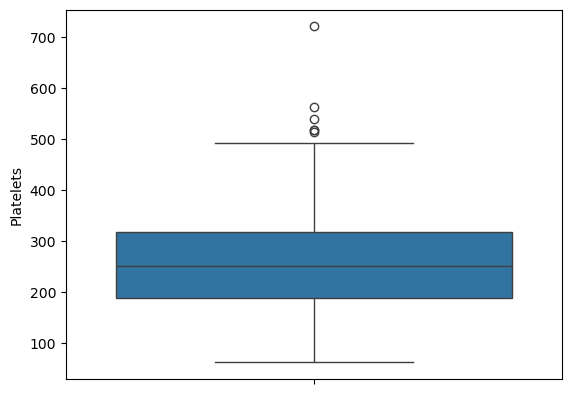

posx and posy should be finite values
posx and posy should be finite values


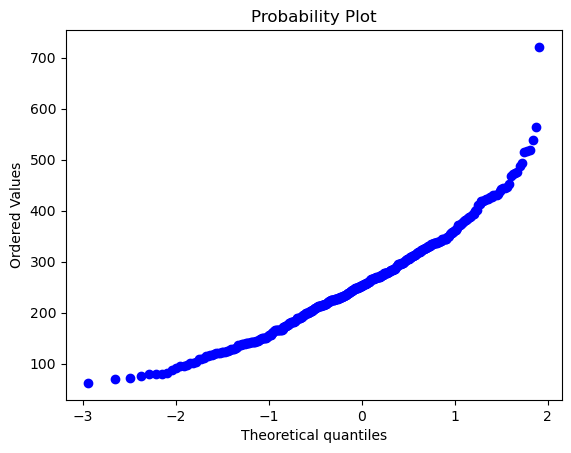

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


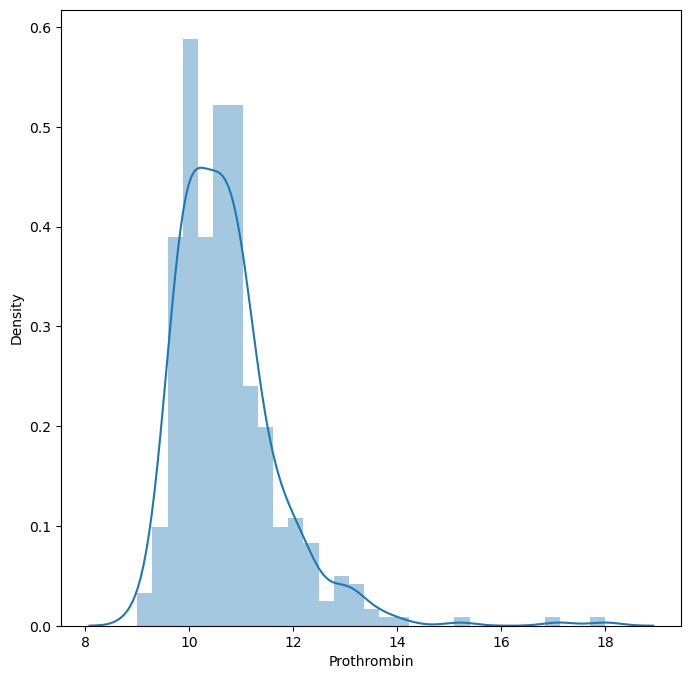

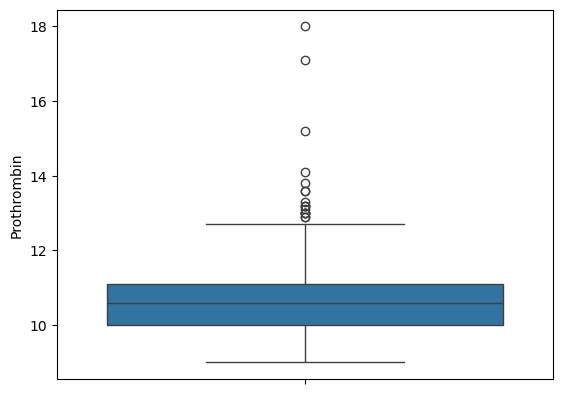

posx and posy should be finite values
posx and posy should be finite values


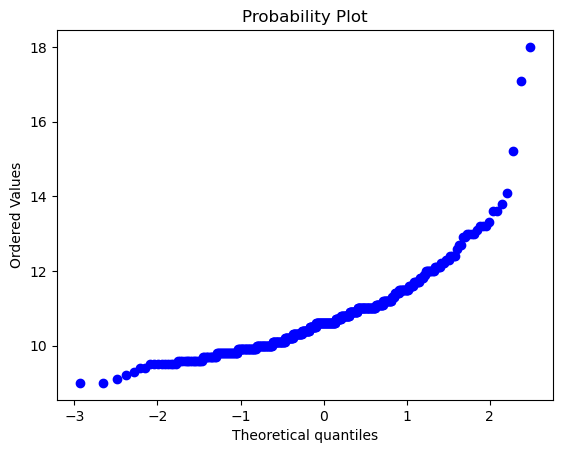

----------------------------


In [9]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [10]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

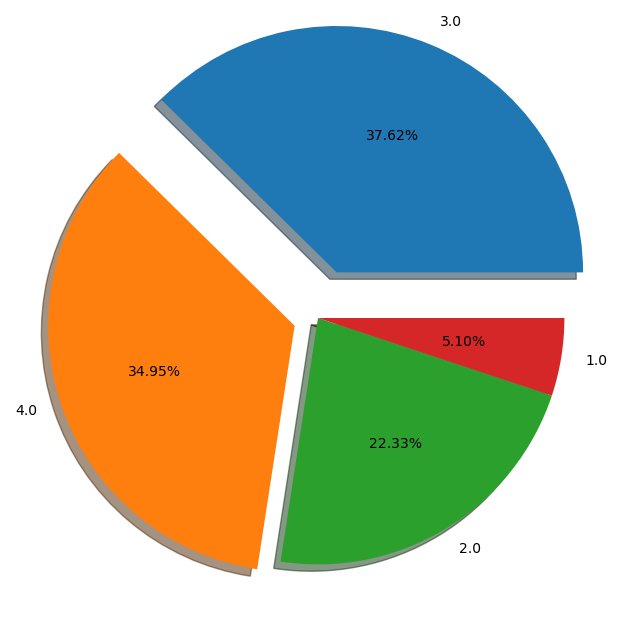

In [11]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

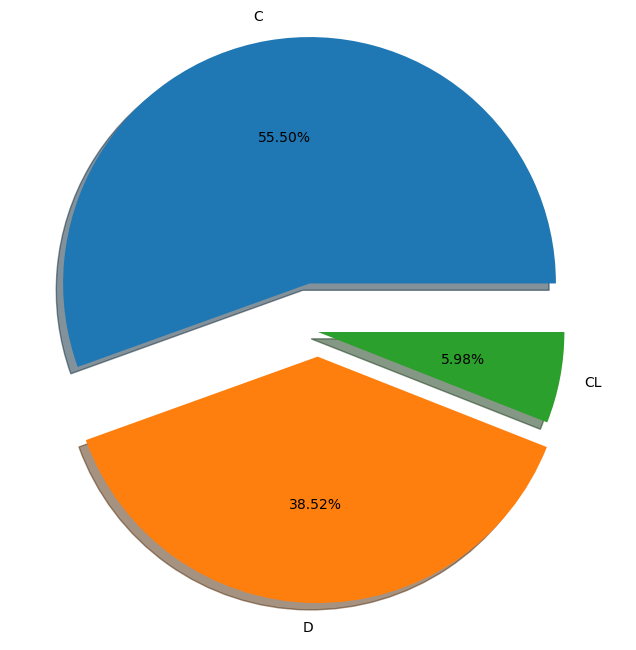

In [12]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

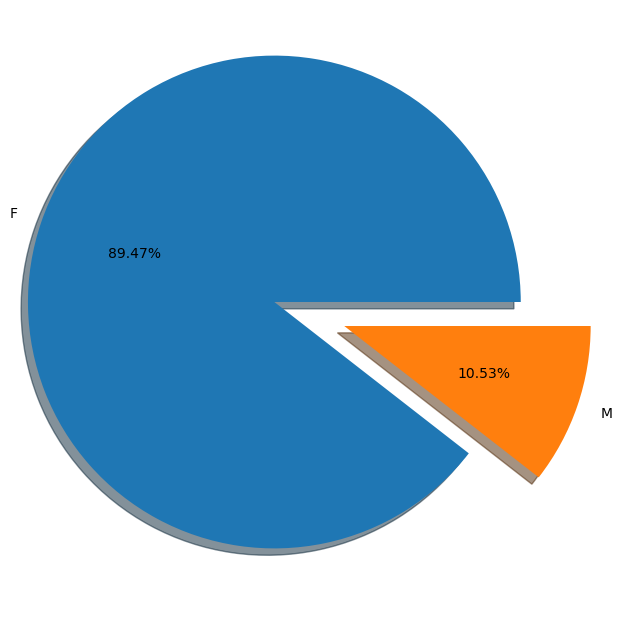

In [13]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

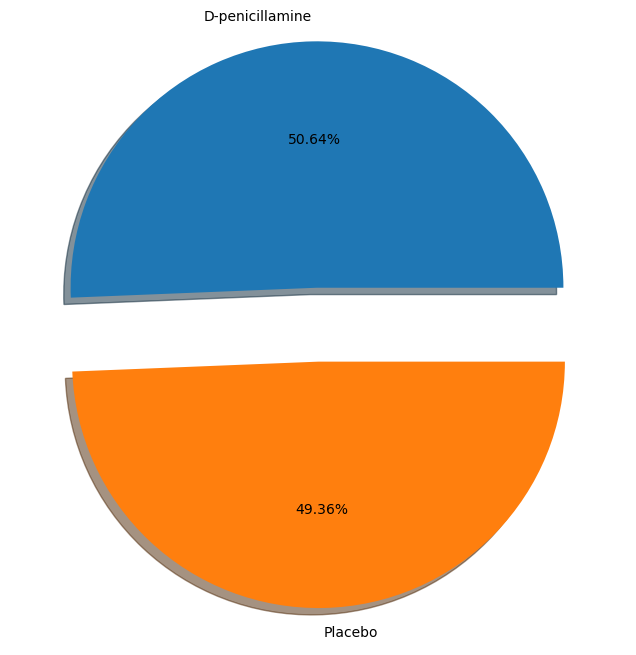

In [14]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

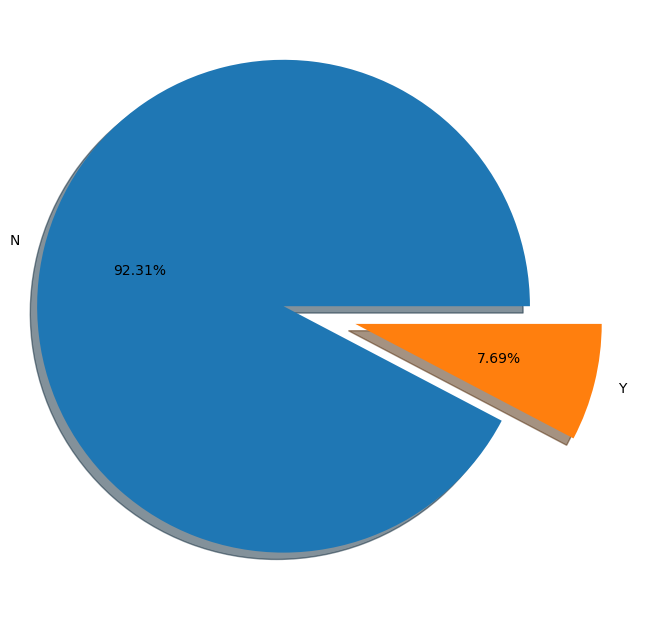

In [15]:
pie_chart(df,'Ascites')

## Only a tiny fraction of the population of patients had Ascites disease.

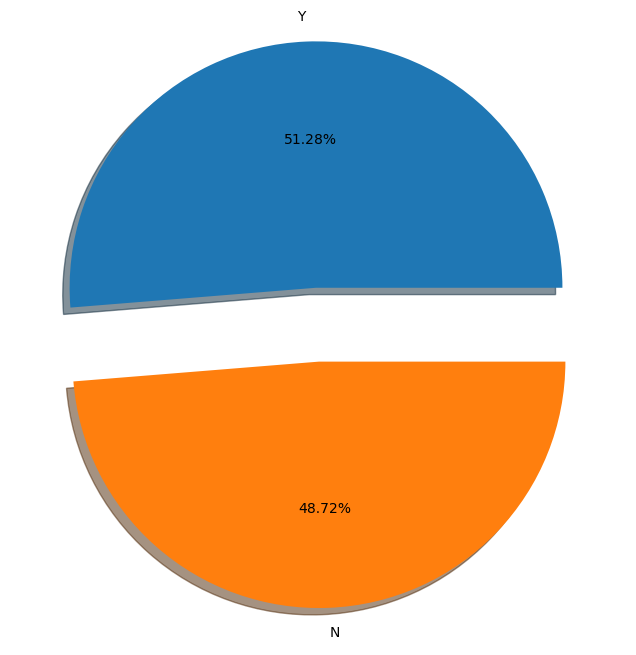

In [16]:
pie_chart(df,'Hepatomegaly')

## The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

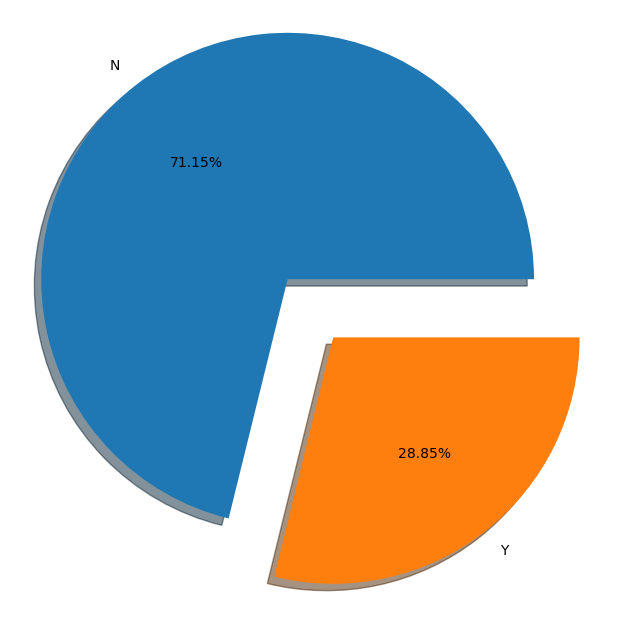

In [17]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

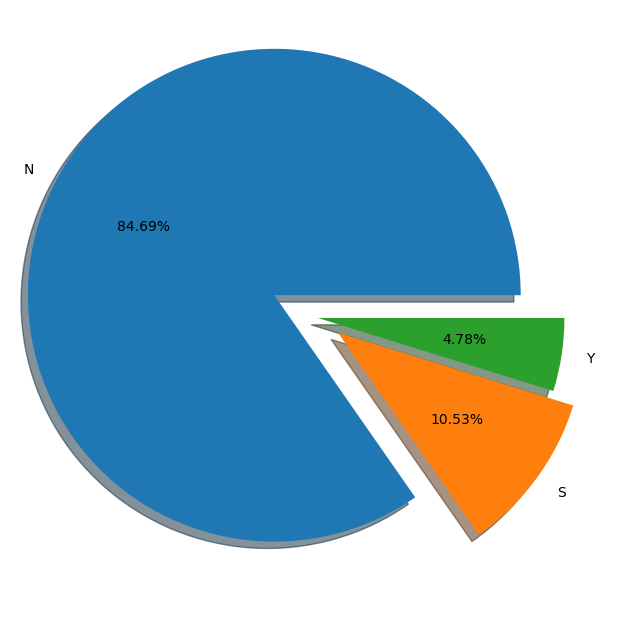

In [18]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of 
just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

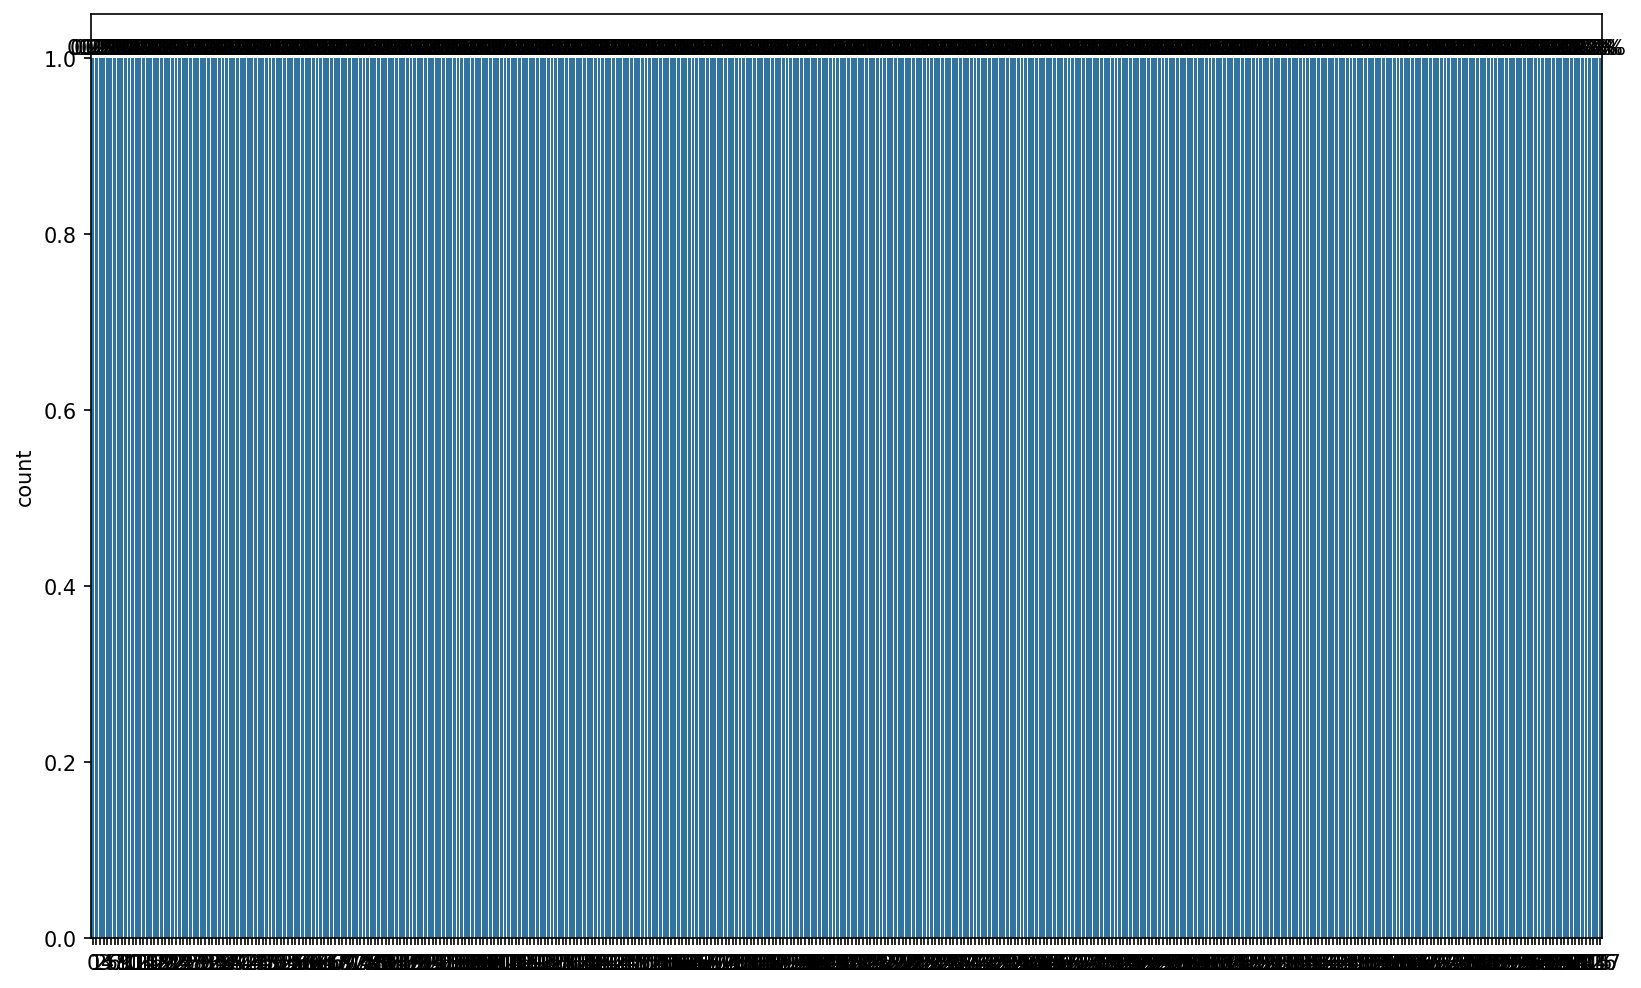

In [19]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class. 

## Bivariate Analysis

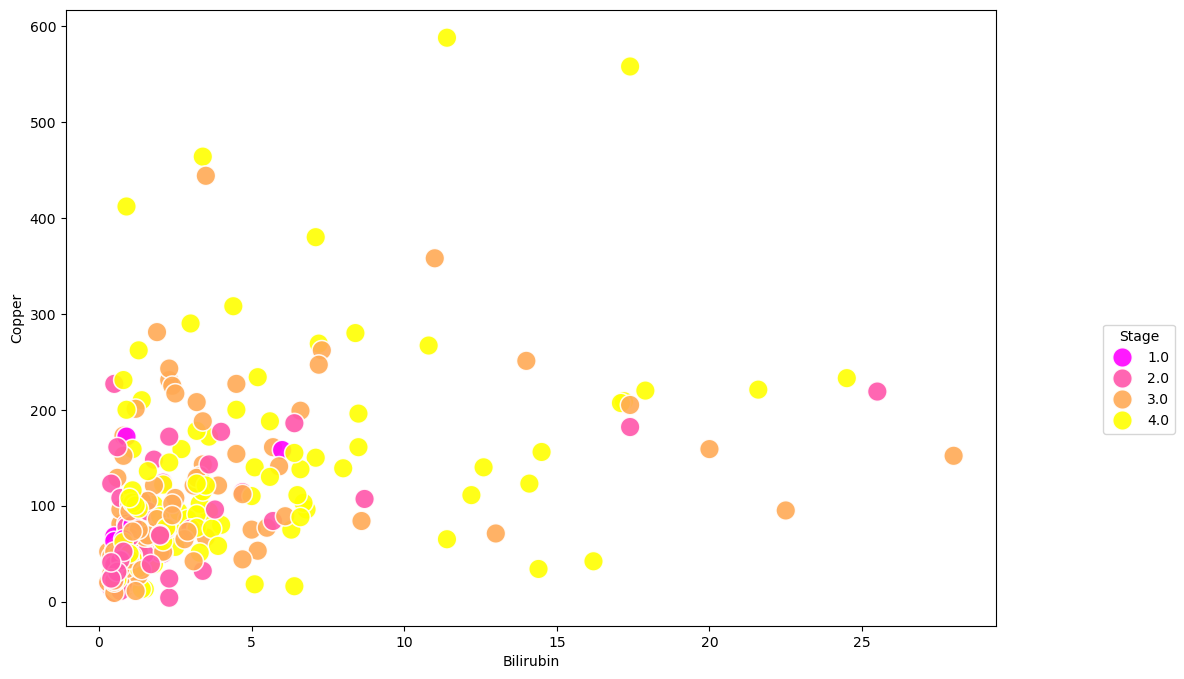

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [21]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [22]:
males.describe()

N_Days           Age  Bilirubin  Cholesterol    Albumin  \
count    44.000000     44.000000  44.000000    35.000000  44.000000   
mean   1894.022727  20348.340909   2.865909   362.457143   3.535000   
std    1213.034356   4009.641699   2.319477   178.993319   0.456598   
min     140.000000  12227.000000   0.600000   151.000000   2.270000   
25%    1060.750000  17886.000000   1.300000   245.000000   3.327500   
50%    1507.000000  19724.000000   2.050000   317.000000   3.645000   
75%    2715.750000  23588.750000   3.500000   426.500000   3.870000   
max    4459.000000  28650.000000   9.500000  1000.000000   4.300000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   36.000000     36.000000   36.000000      35.000000   43.000000   
mean   154.277778   2172.950000  121.990556     133.428571  231.139535   
std    100.665389   2418.446239   47.013095      52.168441   85.225634   
min     13.000000    516.000000   46.500000      49.000000   70.000000   
25%     80.750000    852.000000   82.770000      91.000000  165.500000   
50%    134.500000   1116.000000  121.675000     126.000000  217.000000   
75%    211.750000   2313.000000  153.450000     163.000000  298.500000   
max    444.000000  10396.800000  221.880000     242.000000  394.000000   

       Prothrombin      Stage  
count    44.000000  44.000000  
mean     10.940909   3.068182  
std       0.931445   0.925045  
min       9.700000   1.000000  
25%      10.275000   2.750000  
50%      10.900000   3.000000  
75%      11.225000   4.000000  
max      14.100000   4.000000

In [23]:
females.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [24]:
round(males.Status.value_counts() / len(males) * 100,2)

Status
D     54.55
C     38.64
CL     6.82
Name: count, dtype: float64

In [25]:
round(females.Status.value_counts() / len(females) * 100,2)

Status
C     57.49
D     36.63
CL     5.88
Name: count, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [26]:
round(males.Stage.value_counts() / len(males) * 100,2)

Stage
4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: count, dtype: float64

In [27]:
round(females.Stage.value_counts() / len(females) * 100,2)

Stage
3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: count, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [28]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Hepatomegaly
Y    47.73
N    34.09
Name: count, dtype: float64

In [29]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Hepatomegaly
Y    37.17
N    36.63
Name: count, dtype: float64

Male patients are more likely to suffer from Hepatomegaly disease in comparison to female patients.

## Multivariate Analysis

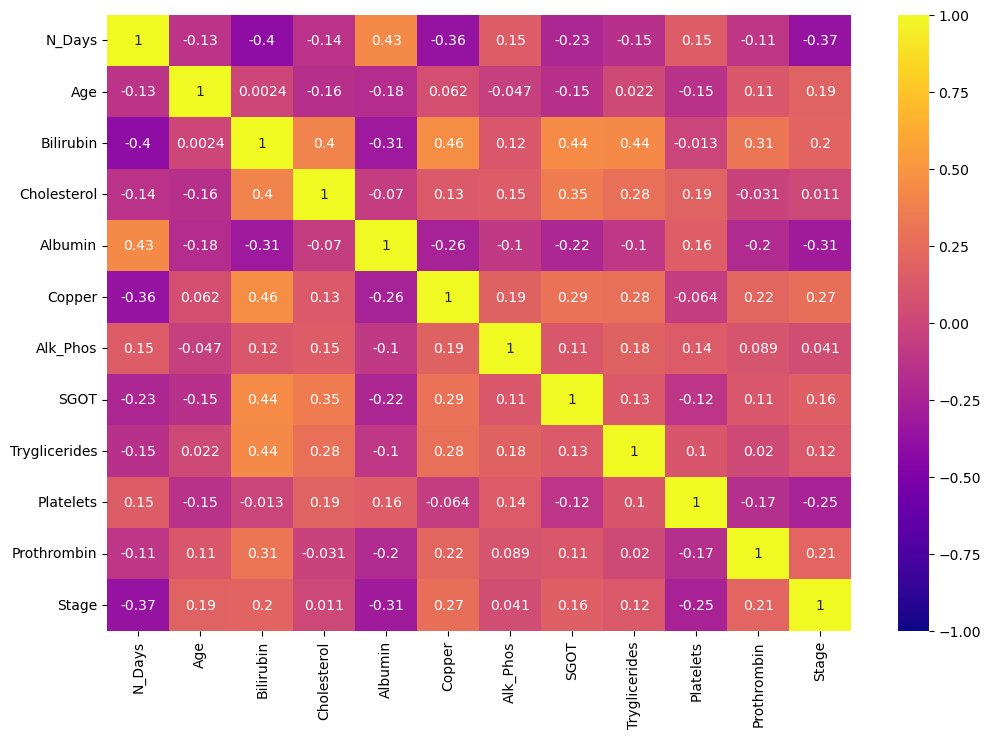

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.show()

There are no major correlations between any pair of features in the dataset.

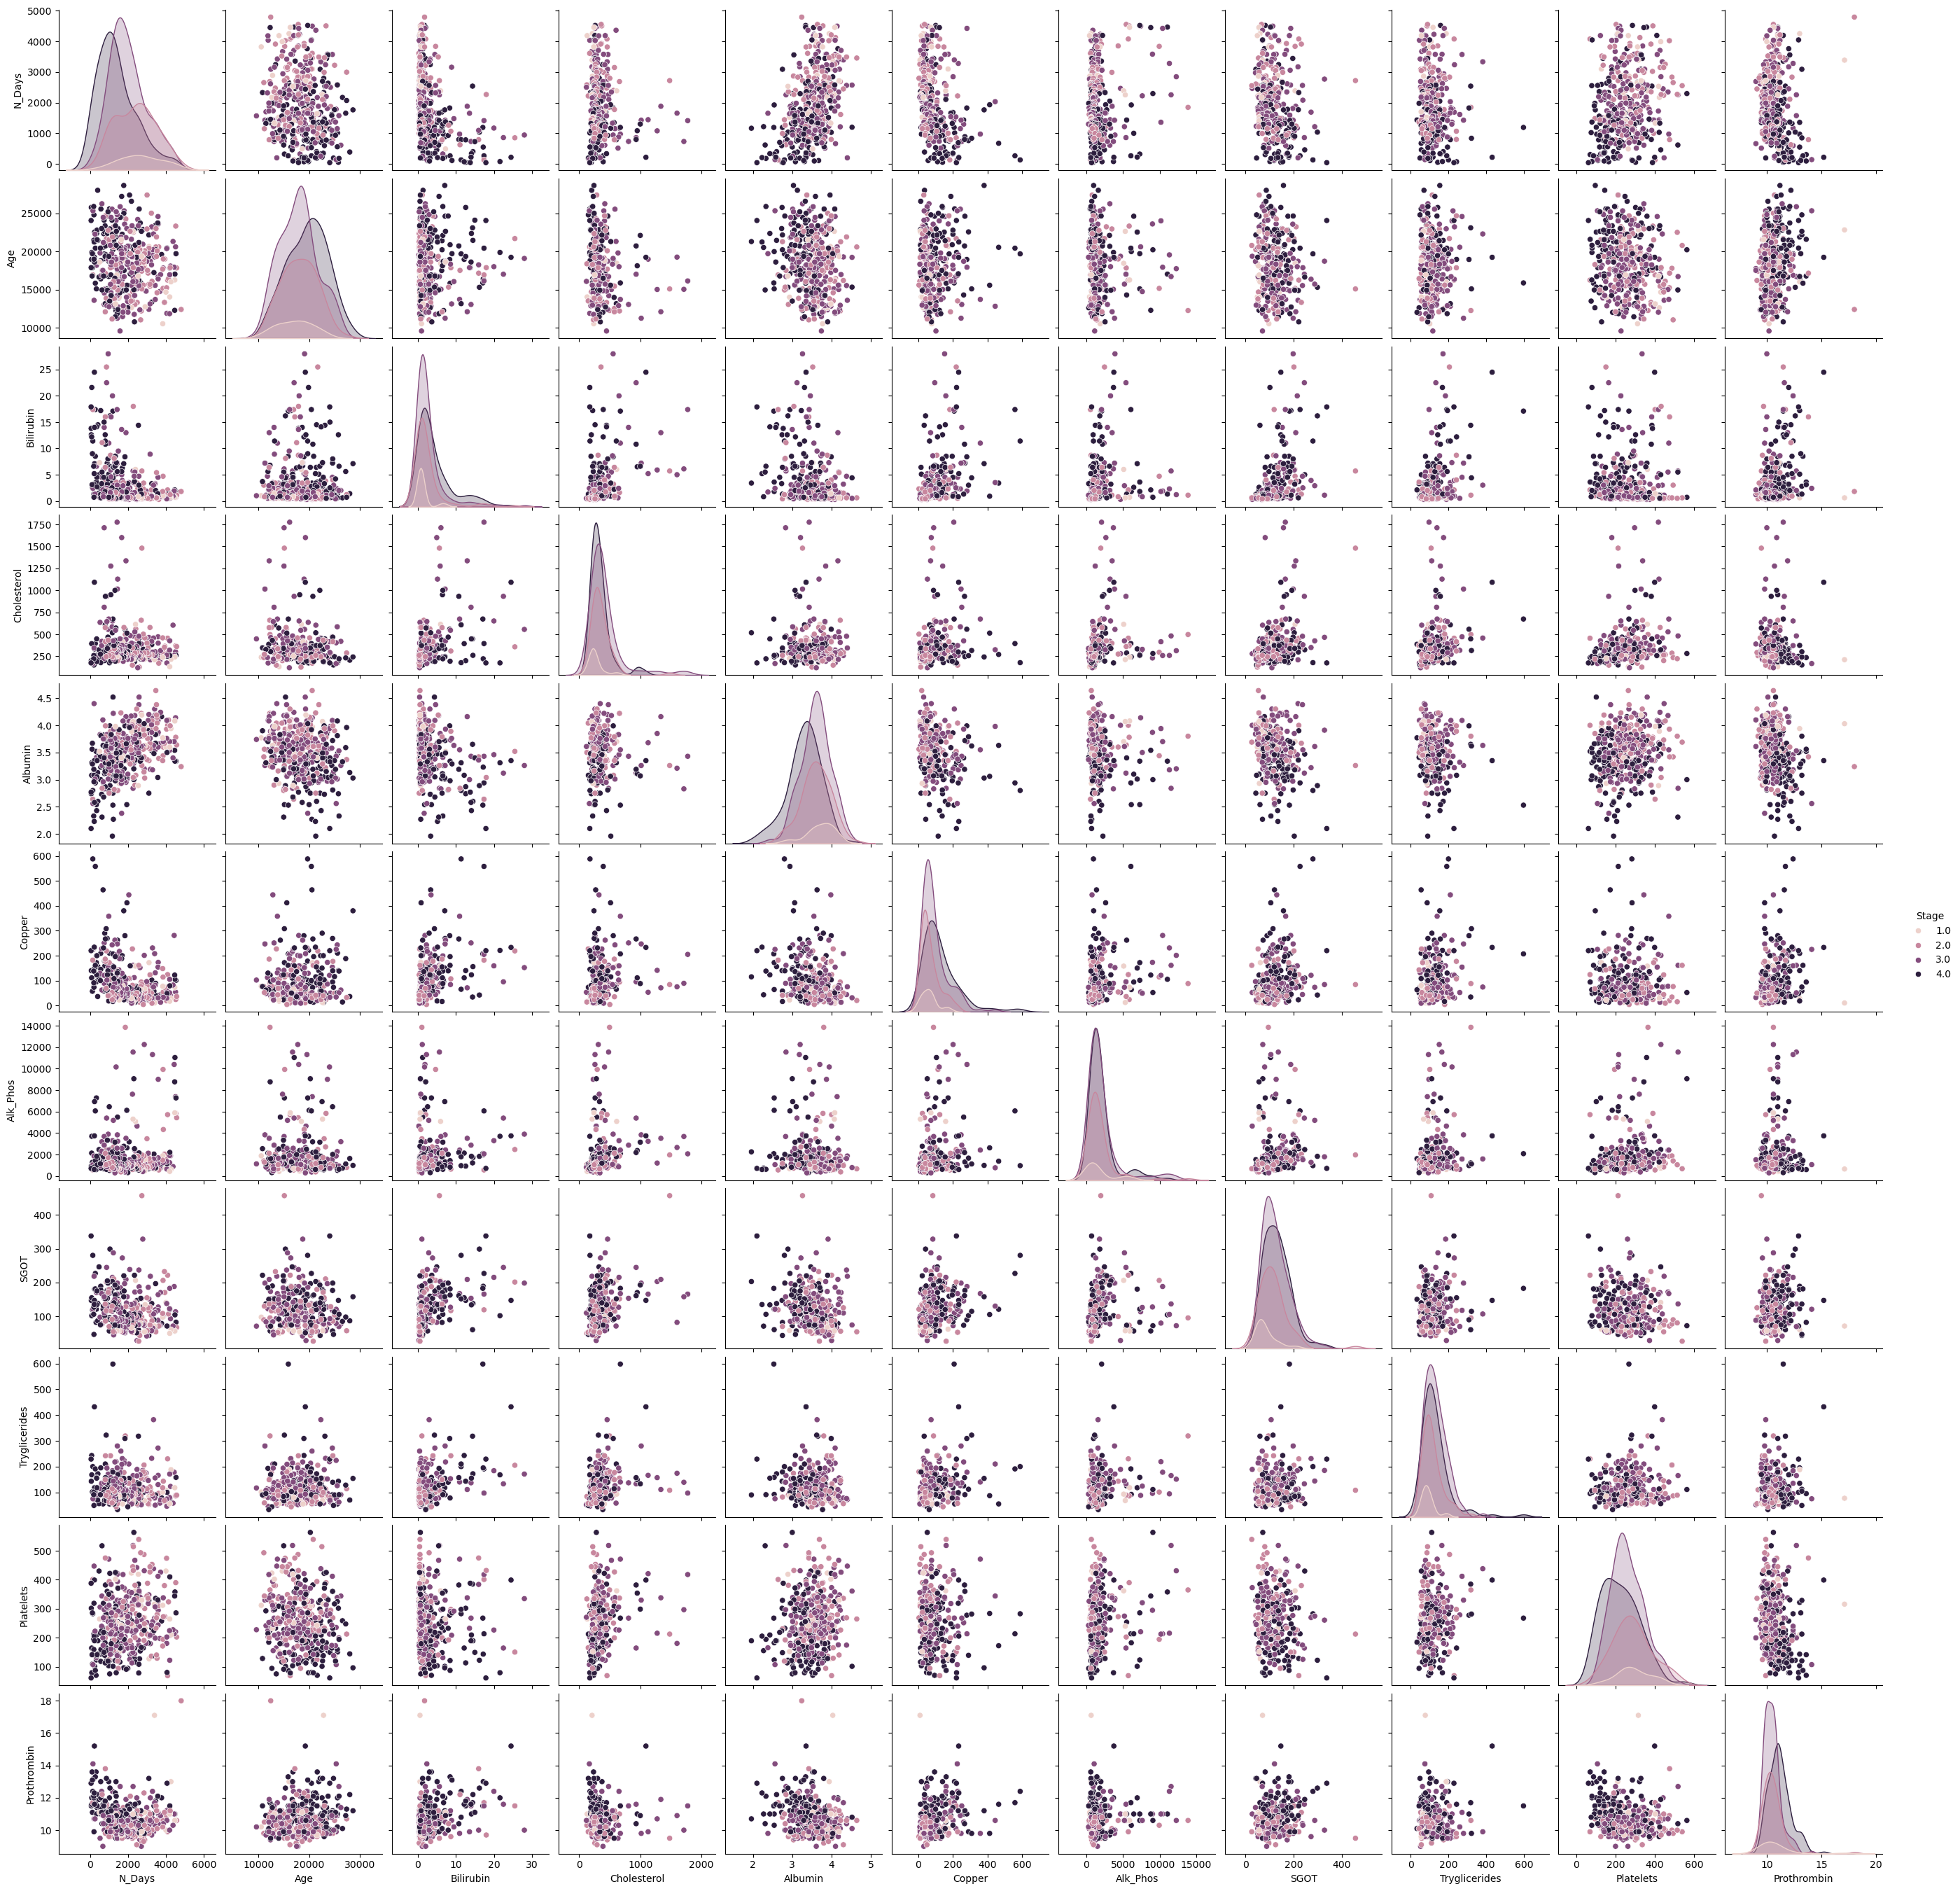

In [31]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

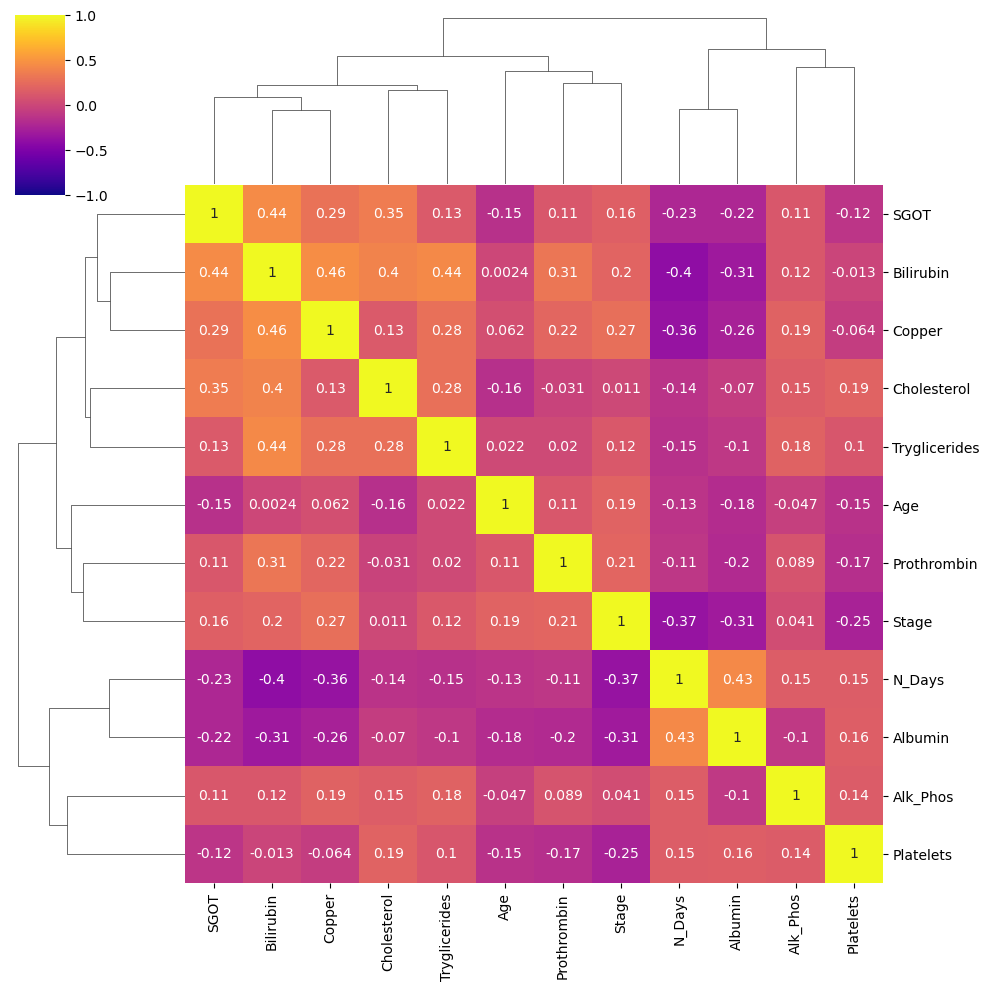

In [32]:
sns.clustermap(df.select_dtypes(include=[np.number]).corr(), cmap='plasma', annot=True, vmin=-1, vmax=1)
plt.show()

## Feature Engineering

In [33]:
df.Age = (df.Age.values/365.0).round()
df.head()

N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

### Imputation of missing values

In [34]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

### Treatment of outliers

In [35]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

### Encoding of categorical features

In [36]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [37]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

## Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [38]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

<Axes: ylabel='count'>

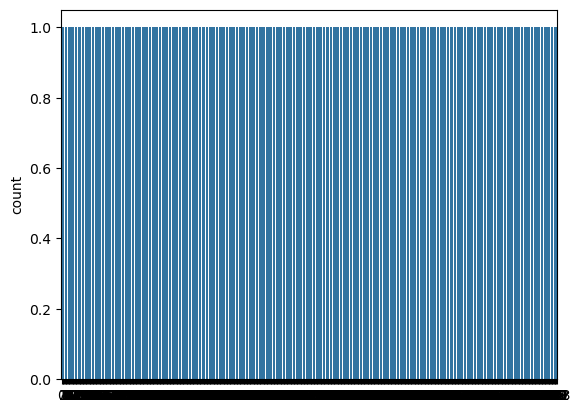

In [39]:
sns.countplot(y)

## Feature Scaling

In [40]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.755734  0.893983 -0.368105  4.856661      0.937772  2.256592  3.138892   
1 -0.755734  0.589016 -0.368105 -0.219162      0.937772  2.256592  0.151469   
2 -0.755734  2.012193  3.108163 -0.219162     -1.146669 -0.475697 -2.835953   
3 -0.755734  0.487361 -0.368105 -0.219162      0.937772  2.256592 -2.835953   
4  1.482678 -1.240782 -0.368105 -0.219162      0.937772  2.256592  0.151469   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.404665    -0.687210 -2.503553  1.895267  0.556231  0.681468   
1  -0.513886    -0.101746  1.528636 -0.517223  2.156650  0.044061   
2  -0.372666    -1.900976 -0.199445  2.344653 -1.316899 -0.410447   
3  -0.184372    -0.929963 -2.660651 -0.280704  2.156650 -1.335901   
4   0.568802    -0.430177 -0.068529  1.587793 -1.075356  0.034407   

   Tryglicerides  Platelets  Prothrombin  
0       2.065960  -0.851283     1.929153  
1      -0.725873  -0.504281    -0.047013  
2      -1.822664  -1.287834     1.682132  
3      -0.592928  -0.929638    -0.417544  
4      -1.257650  -1.455739     0.323518

## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.64      0.56        50
           2       0.26      0.17      0.21        52
           3       0.31      0.38      0.34        39
           4       0.70      0.62      0.66        53

    accuracy                           0.46       194
   macro avg       0.44      0.46      0.44       194
weighted avg       0.45      0.46      0.45       194



In [44]:
y_pred = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32 12  4  2]
 [18  9 21  4]
 [ 9  7 15  8]
 [ 5  7  8 33]]


In [45]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [46]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.62      0.94      0.75        50
           2       0.71      0.46      0.56        52
           3       0.35      0.44      0.39        39
           4       0.77      0.51      0.61        53

    accuracy                           0.59       194
   macro avg       0.61      0.59      0.58       194
weighted avg       0.63      0.59      0.59       194



In [47]:
y_pred = svm.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47  0  3  0]
 [11 24 15  2]
 [10  6 17  6]
 [ 8  4 14 27]]


In [48]:
X_test = np.array(X_test)
y_test = np.array(y_test)
scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)


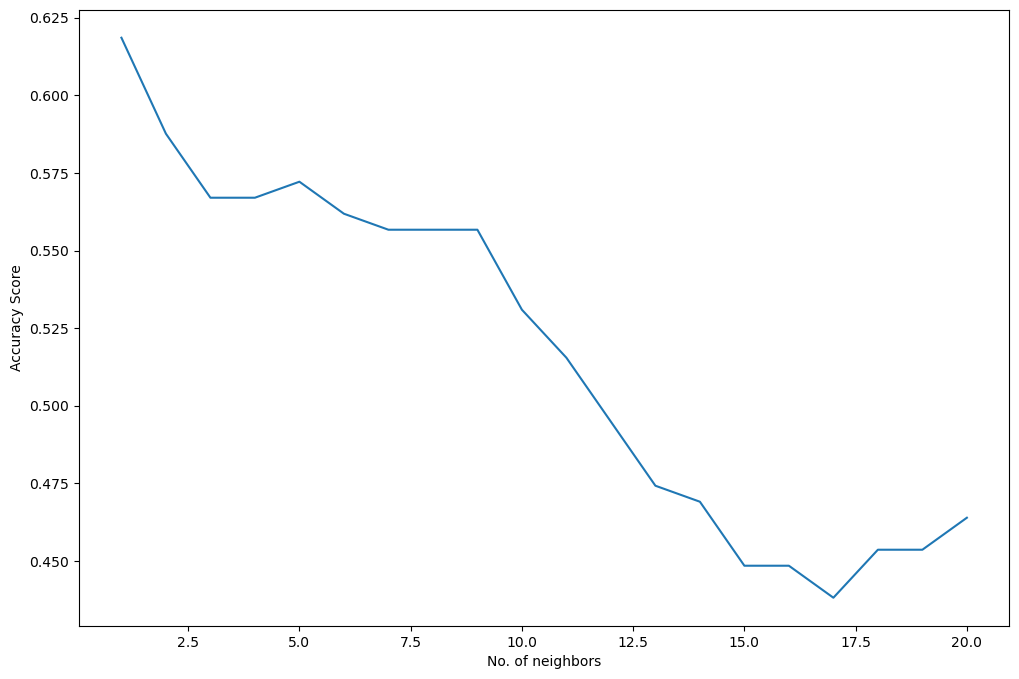

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(x=np.arange(1, 21), y=scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')
plt.show()


In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[46  0  4  0]
 [27  7 15  3]
 [17  6 10  6]
 [12  5 14 22]]
              precision    recall  f1-score   support

           1       0.45      0.92      0.61        50
           2       0.39      0.13      0.20        52
           3       0.23      0.26      0.24        39
           4       0.71      0.42      0.52        53

    accuracy                           0.44       194
   macro avg       0.45      0.43      0.39       194
weighted avg       0.46      0.44      0.40       194



In [52]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [53]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[26 18  6  0]
 [17 18 14  3]
 [10  8 15  6]
 [ 6 15  9 23]]
              precision    recall  f1-score   support

           1       0.44      0.52      0.48        50
           2       0.31      0.35      0.32        52
           3       0.34      0.38      0.36        39
           4       0.72      0.43      0.54        53

    accuracy                           0.42       194
   macro avg       0.45      0.42      0.43       194
weighted avg       0.46      0.42      0.43       194



In [54]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [55]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[42  2  4  2]
 [23  4 13 12]
 [15  3  7 14]
 [12  7  7 27]]
              precision    recall  f1-score   support

           1       0.46      0.84      0.59        50
           2       0.25      0.08      0.12        52
           3       0.23      0.18      0.20        39
           4       0.49      0.51      0.50        53

    accuracy                           0.41       194
   macro avg       0.36      0.40      0.35       194
weighted avg       0.36      0.41      0.36       194



In [56]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [57]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[37  3  6  4]
 [20  4 21  7]
 [11  6 14  8]
 [ 6  5  9 33]]
              precision    recall  f1-score   support

           1       0.50      0.74      0.60        50
           2       0.22      0.08      0.11        52
           3       0.28      0.36      0.31        39
           4       0.63      0.62      0.63        53

    accuracy                           0.45       194
   macro avg       0.41      0.45      0.41       194
weighted avg       0.42      0.45      0.42       194



In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[44  2  3  1]
 [ 7 26 10  9]
 [ 5  3 20 11]
 [ 2 11 15 25]]
              precision    recall  f1-score   support

           1       0.76      0.88      0.81        50
           2       0.62      0.50      0.55        52
           3       0.42      0.51      0.46        39
           4       0.54      0.47      0.51        53

    accuracy                           0.59       194
   macro avg       0.58      0.59      0.58       194
weighted avg       0.59      0.59      0.59       194



In [60]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

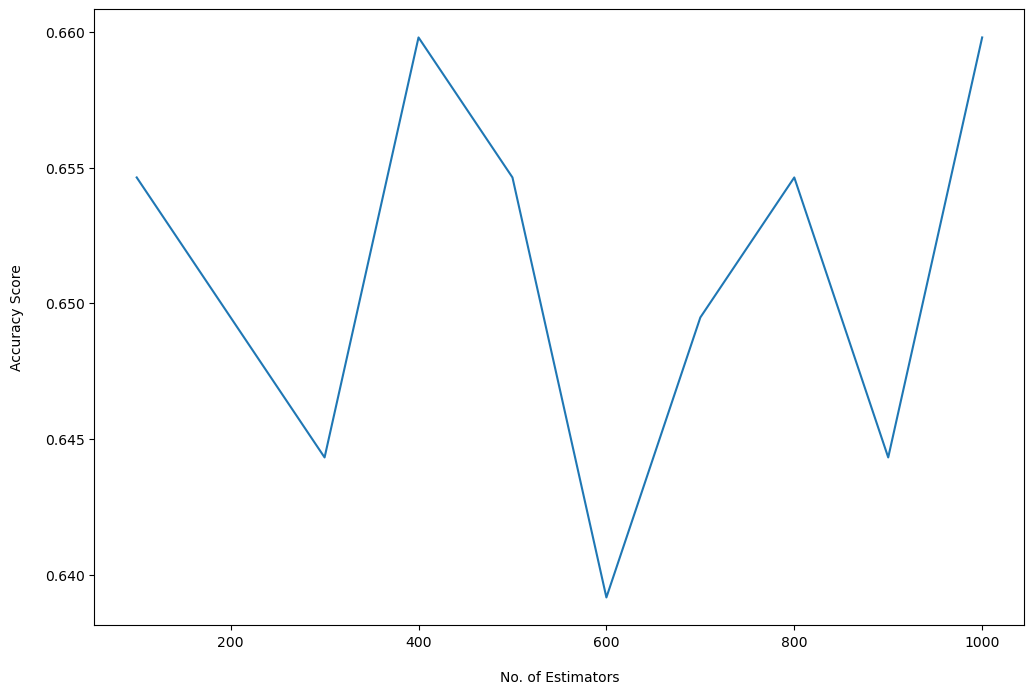

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(x=np.arange(100, 1001, 100), y=scores)
plt.xlabel('No. of Estimators', labelpad=15)
plt.ylabel('Accuracy Score', labelpad=15)
plt.show()


In [62]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[49  0  0  1]
 [ 3 27 17  5]
 [ 6  6 20  7]
 [ 1  7 17 28]]
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        50
           2       0.68      0.52      0.59        52
           3       0.37      0.51      0.43        39
           4       0.68      0.53      0.60        53

    accuracy                           0.64       194
   macro avg       0.64      0.64      0.63       194
weighted avg       0.66      0.64      0.64       194



<Axes: xlabel='Importance', ylabel='Feature'>

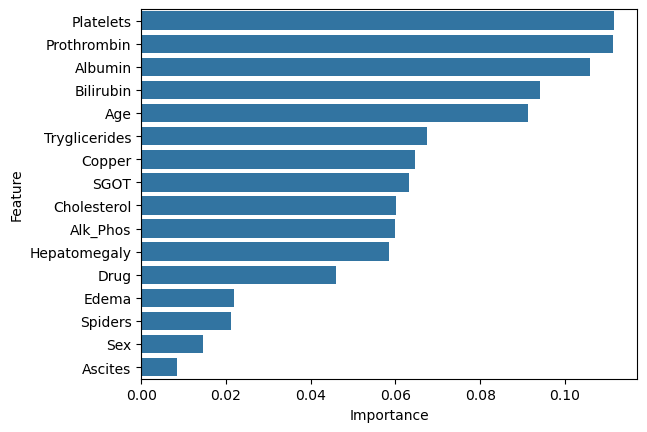

In [64]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

In [65]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[49  1  0  0]
 [ 6 26 18  2]
 [ 5  6 21  7]
 [ 3  6 18 26]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87        50
           2       0.67      0.50      0.57        52
           3       0.37      0.54      0.44        39
           4       0.74      0.49      0.59        53

    accuracy                           0.63       194
   macro avg       0.64      0.63      0.62       194
weighted avg       0.66      0.63      0.63       194



In [67]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[[34 12  3  1]
 [10 23 11  8]
 [ 4 10 15 10]
 [ 3 12 15 23]]
              precision    recall  f1-score   support

           1       0.67      0.68      0.67        50
           2       0.40      0.44      0.42        52
           3       0.34      0.38      0.36        39
           4       0.55      0.43      0.48        53

    accuracy                           0.49       194
   macro avg       0.49      0.49      0.49       194
weighted avg       0.50      0.49      0.49       194



In [69]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.075969
0:	learn: 1.3611311	total: 74.5ms	remaining: 1m 14s
1:	learn: 1.3397009	total: 79.4ms	remaining: 39.6s
2:	learn: 1.3205312	total: 82.8ms	remaining: 27.5s
3:	learn: 1.3043778	total: 86ms	remaining: 21.4s
4:	learn: 1.2890187	total: 89.5ms	remaining: 17.8s
5:	learn: 1.2714546	total: 93.3ms	remaining: 15.4s
6:	learn: 1.2540960	total: 96.6ms	remaining: 13.7s
7:	learn: 1.2361334	total: 99.7ms	remaining: 12.4s
8:	learn: 1.2146302	total: 103ms	remaining: 11.3s
9:	learn: 1.1951544	total: 106ms	remaining: 10.4s
10:	learn: 1.1781519	total: 109ms	remaining: 9.77s
11:	learn: 1.1586031	total: 112ms	remaining: 9.2s
12:	learn: 1.1433523	total: 115ms	remaining: 8.71s
13:	learn: 1.1348230	total: 118ms	remaining: 8.28s
14:	learn: 1.1200446	total: 120ms	remaining: 7.9s
15:	learn: 1.1072321	total: 123ms	remaining: 7.57s
16:	learn: 1.0977054	total: 126ms	remaining: 7.28s
17:	learn: 1.0847535	total: 129ms	remaining: 7.02s
18:	learn: 1.0740678	total: 131ms	remaining: 6.78s
19:	le

In [70]:
cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))

[[49  1  0  0]
 [ 2 33 14  3]
 [ 5  4 22  8]
 [ 1  8 12 32]]
              precision    recall  f1-score   support

           1       0.86      0.98      0.92        50
           2       0.72      0.63      0.67        52
           3       0.46      0.56      0.51        39
           4       0.74      0.60      0.67        53

    accuracy                           0.70       194
   macro avg       0.69      0.70      0.69       194
weighted avg       0.71      0.70      0.70       194



In [71]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [72]:
hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))

[[48  0  0  2]
 [ 1 28 17  6]
 [ 4  3 22 10]
 [ 1  9 13 30]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92        50
           2       0.70      0.54      0.61        52
           3       0.42      0.56      0.48        39
           4       0.62      0.57      0.59        53

    accuracy                           0.66       194
   macro avg       0.66      0.66      0.65       194
weighted avg       0.67      0.66      0.66       194



In [73]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [74]:
bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

[[43  4  2  1]
 [10 23 10  9]
 [ 9  2 19  9]
 [ 2  6 18 27]]
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        50
           2       0.66      0.44      0.53        52
           3       0.39      0.49      0.43        39
           4       0.59      0.51      0.55        53

    accuracy                           0.58       194
   macro avg       0.58      0.57      0.57       194
weighted avg       0.59      0.58      0.57       194



In [75]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [76]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[47  0  2  1]
 [45  0  6  1]
 [31  0  5  3]
 [32  1  2 18]]
              precision    recall  f1-score   support

           1       0.30      0.94      0.46        50
           2       0.00      0.00      0.00        52
           3       0.33      0.13      0.19        39
           4       0.78      0.34      0.47        53

    accuracy                           0.36       194
   macro avg       0.35      0.35      0.28       194
weighted avg       0.36      0.36      0.28       194



In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[46  1  2  1]
 [ 4 24 19  5]
 [ 4  7 18 10]
 [ 3  8 13 29]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.60      0.46      0.52        52
           3       0.35      0.46      0.40        39
           4       0.64      0.55      0.59        53

    accuracy                           0.60       194
   macro avg       0.60      0.60      0.59       194
weighted avg       0.61      0.60      0.60       194



In [79]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 16
[LightGBM] [Info] Start training from score -1.399717
[LightGBM] [Info] Start training from score -1.417900
[LightGBM] [Info] Start training from score -1.305227
[LightGBM] [Info] Start training from score -1.427116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMClassifier()

In [80]:
lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))

[[47  0  3  0]
 [ 1 30 16  5]
 [ 3  6 23  7]
 [ 2  7 15 29]]
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        50
           2       0.70      0.58      0.63        52
           3       0.40      0.59      0.48        39
           4       0.71      0.55      0.62        53

    accuracy                           0.66       194
   macro avg       0.67      0.66      0.66       194
weighted avg       0.69      0.66      0.67       194



In [81]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [82]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))

[[38  3  6  3]
 [15  8 21  8]
 [ 7  7 18  7]
 [ 3  8 14 28]]
              precision    recall  f1-score   support

           1       0.60      0.76      0.67        50
           2       0.31      0.15      0.21        52
           3       0.31      0.46      0.37        39
           4       0.61      0.53      0.57        53

    accuracy                           0.47       194
   macro avg       0.46      0.48      0.45       194
weighted avg       0.47      0.47      0.46       194



In [83]:
# Adjust the target labels to start from 0
y_train = y_train - 1
y_test = y_test - 1

# Now fit the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[49  0  0  1]
 [ 4 25 17  6]
 [ 4  3 21 11]
 [ 1  9 13 30]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        50
           1       0.68      0.48      0.56        52
           2       0.41      0.54      0.47        39
           3       0.62      0.57      0.59        53

    accuracy                           0.64       194
   macro avg       0.64      0.64      0.63       194
weighted avg       0.65      0.64      0.64       194



## Model Performance Analysis

In [85]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 17.01%
Accuracy Score of Passive Aggressive Classifier: 17.01%
Accuracy Score of SGD Classifer: 17.53%
Accuracy Score of Ridge Classifier: 18.04%
Accuracy Score of Gaussian Naive Bayes: 24.23%
Accuracy Score of Bernoulli Naive Bayes: 18.56%
Accuracy Score of K Neighbors Classifier: 24.23%
Accuracy Score of Support Vector Classifier: 15.98%
Accuracy Score of Decision Tree Classifier: 12.89%
Accuracy Score of Random Forest Classifier: 13.4%
Accuracy Score of XG Boost Classifier: 64.43%
Accuracy Score of Cat Boost Classifier: 9.28%
Accuracy Score of Gradient Boosting Classifier: 12.37%
Accuracy Score of Histogram Gradient Boosting Classifier: 8.76%
Accuracy Score of Bagging Classifier: 15.46%
Accuracy Score of Ada Boost Classifier: 18.04%
Accuracy Score of Extra Trees Classifier: 15.46%
Accuracy Score of Light GBM Classifier: 11.34%


XG Boost Classifier is the best performing model that boasts a superb prediction accuracy of around 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [86]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2))
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [87]:
grid_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 400}

In [88]:
grid_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        50
           1       0.69      0.52      0.59        52
           2       0.38      0.54      0.45        39
           3       0.69      0.55      0.61        53

    accuracy                           0.64       194
   macro avg       0.65      0.64      0.63       194
weighted avg       0.66      0.64      0.64       194



In [89]:
cb_cv = cross_validate(cb,X_test,y_test,cv=8,verbose=2)
cb_cv = pd.DataFrame(cb_cv)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cb_cv.test_score.mean()*100,2)) + '%')

Learning rate set to 0.072268
0:	learn: 1.3688147	total: 3.65ms	remaining: 3.65s
1:	learn: 1.3471275	total: 5.07ms	remaining: 2.53s
2:	learn: 1.3313446	total: 6.48ms	remaining: 2.15s
3:	learn: 1.3133065	total: 7.88ms	remaining: 1.96s
4:	learn: 1.2939356	total: 9.37ms	remaining: 1.86s
5:	learn: 1.2737957	total: 10.8ms	remaining: 1.78s
6:	learn: 1.2546817	total: 12.1ms	remaining: 1.71s
7:	learn: 1.2399906	total: 13.4ms	remaining: 1.66s
8:	learn: 1.2237928	total: 14.7ms	remaining: 1.62s
9:	learn: 1.2072416	total: 16.1ms	remaining: 1.59s
10:	learn: 1.1925849	total: 17.4ms	remaining: 1.56s
11:	learn: 1.1789349	total: 18.7ms	remaining: 1.54s
12:	learn: 1.1662224	total: 20ms	remaining: 1.52s
13:	learn: 1.1583866	total: 21.3ms	remaining: 1.5s
14:	learn: 1.1431103	total: 22.6ms	remaining: 1.49s
15:	learn: 1.1307759	total: 24.7ms	remaining: 1.52s
16:	learn: 1.1159162	total: 26.3ms	remaining: 1.52s
17:	learn: 1.1049923	total: 27.8ms	remaining: 1.52s
18:	learn: 1.0957250	total: 29.4ms	remaining: 1

In [90]:
cv_cb = cross_validate(cb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_cb = pd.DataFrame(cv_cb)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cb.test_accuracy.mean()*100,2)) + '%')

Learning rate set to 0.07195
0:	learn: 1.3695267	total: 4.16ms	remaining: 4.16s
1:	learn: 1.3423156	total: 5.96ms	remaining: 2.97s
2:	learn: 1.3251583	total: 7.67ms	remaining: 2.55s
3:	learn: 1.3057175	total: 9.19ms	remaining: 2.29s
4:	learn: 1.2900235	total: 10.8ms	remaining: 2.15s
5:	learn: 1.2775019	total: 12.2ms	remaining: 2.02s
6:	learn: 1.2597312	total: 13.6ms	remaining: 1.93s
7:	learn: 1.2425342	total: 15.1ms	remaining: 1.88s
8:	learn: 1.2258915	total: 16.5ms	remaining: 1.81s
9:	learn: 1.2068541	total: 18.1ms	remaining: 1.79s
10:	learn: 1.1954829	total: 19.5ms	remaining: 1.75s
11:	learn: 1.1802486	total: 20.9ms	remaining: 1.72s
12:	learn: 1.1621479	total: 22.2ms	remaining: 1.68s
13:	learn: 1.1510780	total: 23.5ms	remaining: 1.66s
14:	learn: 1.1402240	total: 24.7ms	remaining: 1.63s
15:	learn: 1.1294378	total: 26.1ms	remaining: 1.6s
16:	learn: 1.1172507	total: 27.6ms	remaining: 1.6s
17:	learn: 1.1049548	total: 28.9ms	remaining: 1.58s
18:	learn: 1.0945174	total: 30.1ms	remaining: 1

In [91]:
cb_cv = cross_val_score(cb,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(np.mean(cb_cv)*100,2)) + '%')

Learning rate set to 0.072375
0:	learn: 1.3624958	total: 1.6ms	remaining: 1.6s
1:	learn: 1.3461197	total: 3.25ms	remaining: 1.62s
2:	learn: 1.3315142	total: 4.98ms	remaining: 1.66s
3:	learn: 1.3113166	total: 6.81ms	remaining: 1.7s
4:	learn: 1.2936167	total: 8.65ms	remaining: 1.72s
5:	learn: 1.2758506	total: 10.3ms	remaining: 1.7s
6:	learn: 1.2578531	total: 12.1ms	remaining: 1.71s
7:	learn: 1.2442999	total: 13.8ms	remaining: 1.71s
8:	learn: 1.2295222	total: 15.5ms	remaining: 1.7s
9:	learn: 1.2090668	total: 17.2ms	remaining: 1.7s
10:	learn: 1.1949234	total: 18.9ms	remaining: 1.7s
11:	learn: 1.1828417	total: 20.7ms	remaining: 1.71s
12:	learn: 1.1705707	total: 22.5ms	remaining: 1.71s
13:	learn: 1.1638419	total: 24.4ms	remaining: 1.72s
14:	learn: 1.1530616	total: 27.2ms	remaining: 1.78s
15:	learn: 1.1430827	total: 77.5ms	remaining: 4.77s
16:	learn: 1.1284315	total: 80ms	remaining: 4.63s
17:	learn: 1.1143607	total: 86.4ms	remaining: 4.71s
18:	learn: 1.1003535	total: 91.2ms	remaining: 4.71s
1

In [92]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

Mean Accuracy Score of Random Forest Classifier: 54.61%


In [93]:
cv_rf = cross_validate(rf,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_rf = pd.DataFrame(cv_rf)
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   1.6s
Mean Accuracy Score of Random Forest Classifier: 55.16%


In [94]:
et_cv = cross_validate(et,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=10),verbose=1,scoring=['accuracy','roc_auc_ovr_weighted','roc_auc_ovo_weighted','f1_weighted'])
et_cv = pd.DataFrame(et_cv)
et_cv.head()

fit_time  score_time  test_accuracy  test_roc_auc_ovr_weighted  \
0  0.104631    0.028804       0.384615                   0.656898   
1  0.094580    0.026854       0.584615                   0.798984   
2  0.094115    0.026819       0.500000                   0.766912   
3  0.093633    0.026620       0.476923                   0.734074   
4  0.095887    0.027176       0.492308                   0.720048   

   test_roc_auc_ovo_weighted  test_f1_weighted  
0                   0.652512          0.374386  
1                   0.789716          0.550325  
2                   0.757270          0.475055  
3                   0.728180          0.462666  
4                   0.705336          0.458101

In [95]:
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(et_cv.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 52.53%


In [96]:
param_grid = {'n_neighbors': np.arange(1,51), 
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn,param_grid,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=6),verbose=2)
grid_knn.fit(X_train,y_train)

Fitting 12 folds for each of 400 candidates, totalling 4800 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1,

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=6, n_splits=2, random_state=None),
             estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [97]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'}

In [98]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85        50
           1       0.61      0.58      0.59        52
           2       0.34      0.38      0.36        39
           3       0.74      0.47      0.57        53

    accuracy                           0.62       194
   macro avg       0.61      0.61      0.60       194
weighted avg       0.63      0.62      0.61       194



In [99]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy']}

In [100]:
# Update the param_grid
param_grid = {
    'learning_rate': [0.2, 0.5, 0.8, 1.0],
    'loss': ['log_loss']  # Use 'log_loss' for classification
}

# Define and fit the GridSearchCV for HistGradientBoostingClassifier
grid_hgb = GridSearchCV(HistGradientBoostingClassifier(), param_grid, cv=RepeatedStratifiedKFold(n_splits=4, n_repeats=3), verbose=2)
grid_hgb.fit(X_train, y_train)




Fitting 12 folds for each of 4 candidates, totalling 48 fits
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, loss=log_loss; total time=   0.4s
[CV] END ...................learning_rate=0.2, l

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=4, random_state=None),
             estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1.0],
                         'loss': ['log_loss']},
             verbose=2)

In [101]:
grid_hgb.best_params_

{'learning_rate': 0.8, 'loss': 'log_loss'}

In [102]:
grid_hgb_pred = grid_hgb.predict(X_test)
print(classification_report(y_test,grid_hgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        50
           1       0.65      0.46      0.54        52
           2       0.37      0.49      0.42        39
           3       0.62      0.57      0.59        53

    accuracy                           0.61       194
   macro avg       0.61      0.61      0.60       194
weighted avg       0.63      0.61      0.61       194



In [103]:
from sklearn.metrics import get_scorer_names
sorted(get_scorer_names())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [104]:
cv_lgbm = cross_validate(lgbm,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_lgbm = pd.DataFrame(cv_lgbm)
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 14
[LightGBM] [Info] Start training from score -1.365816
[LightGBM] [Info] Start training from score -1.313172
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.287854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [105]:
cv_abc = cross_validate(abc,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_abc = pd.DataFrame(cv_abc)
print("Mean Accuracy Score of Ada Boost Classifier:",str(np.round(cv_abc.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
Mean Accuracy Score of Ada Boost Classifier: 38.7%


In [106]:
cv_hgb = cross_validate(hgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_hgb = pd.DataFrame(cv_hgb)
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hgb.test_accuracy.mean()*100,2)) + '%')

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
Mean Accuracy Score of Histogram-based Gradient Boosting Classifier: 52.1%


In [107]:
cv_xgb = cross_validate(xgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_xgb = pd.DataFrame(cv_xgb)
cv_xgb.head()

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


fit_time  score_time  test_accuracy  test_f1_weighted  \
0  0.130574    0.015111       0.487179          0.457809   
1  0.103655    0.014578       0.538462          0.534118   
2  0.105768    0.013337       0.512821          0.496760   
3  0.094182    0.014127       0.692308          0.672015   
4  0.095114    0.015019       0.447368          0.405797   

   test_recall_weighted  test_precision_weighted   test_r2  \
0              0.487179                 0.451363 -0.167183   
1              0.538462                 0.546746  0.536174   
2              0.512821                 0.487323  0.246283   
3              0.692308                 0.663248  0.594153   
4              0.447368                 0.397340  0.029787   

   test_roc_auc_ovr_weighted  
0                   0.681406  
1                   0.747332  
2                   0.767457  
3                   0.841292  
4                   0.728571

In [108]:
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of XG Boost Classifier: 54.86%


## Saving the model for future use

In [109]:
joblib.dump(cb,'model.pkl')

['model.pkl']

In [110]:
model = joblib.load('model.pkl')
model

In [111]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [112]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()